# AI-LAB SESSION 5: Deep Reinforcement Learning

In this lesson we will see some additional environment in addition to Cliff, the environment of the previus lesson. Moreover, we will see how to create and work with a neural network with Kears.

## CartPole
The environment used is **CartPole** (taken from the book of Sutton and Barto as visible in the figure)

![Cartpole](images/cartpole.jpg)

A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.

In [1]:
import os, sys, tensorflow.keras, random, numpy
module_path = os.path.abspath(os.path.join('../tools'))
if module_path not in sys.path:
    sys.path.append(module_path)

import gym, envs
from utils.ai_lab_functions import *
from timeit import default_timer as timer
from tqdm import tqdm as tqdm
from collections import deque
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

The **state** of environment is represented as a tuple of 4 values: 
- *Cart Position* ranged from -4.9 to 4.8
- *Cart Velocity* ranged from -inf to +inf
- *Pole Angle* ranged from -24 deg to 24 deg
- *Pole Velocity* ranged from -inf to +inf

The **actions** allowed in the environment are 2:
- *action 0*: push cart to left
- *action 1*: push cart to right

The **reward** is 1 for every step taken, including the termination step.

In [2]:
env = gym.make("CartPole-v1")
state = env.reset()
print("STARTING STATE: {}".format(state))
print("\tCart Position: {}\n\tCart Velocity {}\n\tPole Angle {} \n\tPole Velocity {}".format(state[0], state[1], state[2], state[3]))

print("\nPOSSIBLE ACTIONS: ", env.action_space.n)

STARTING STATE: [-0.04308159  0.00616254  0.00745132  0.00695824]
	Cart Position: -0.043081589055972404
	Cart Velocity 0.00616253791935184
	Pole Angle 0.007451324585389309 
	Pole Velocity 0.006958244301048064

POSSIBLE ACTIONS:  2


/home/dcorsi/miniconda3/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Finally, we still have the standard functionalities of a Gym environments:
- step(action): the agent performs action from the current state. Returns a tuple (new_state, reward, done, info) where:
    - new_state: is the new state reached as a consequence of the agent's last action
    - reward: the reward obtained by the agent in this step
    - done: True if the episode is terminal, False otherwise
    - info: not used, you can safely discard it

- reset(): the environment is reset and the agent goes back to the starting position. Returns the initial state id

## Neural Netowrk with Kears
**Keras** is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, R, Theano, or PlaidML. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

![Network](images/neural_networks.png)

With kears you can easly create a neural network with the **Sequential** module. Before train a neural netowrk you must compile it, selecting the loss function and the optimizer, in our experiment we will use the *mean_squared_error* and the *adam* optimizer, that is a standard configuration for a DQN problem.

In [3]:
input_layer = 3
layer_size = 5
output_layer = 2

model = Sequential()
model.add(Dense(layer_size, input_dim=input_layer, activation="relu")) #input layer + hidden layer #1
model.add(Dense(layer_size, activation="relu")) #hidden layer #2
model.add(Dense(layer_size, activation="relu")) #hidden layer #3
model.add(Dense(layer_size, activation="relu")) #hidden layer #4
model.add(Dense(layer_size, activation="relu")) #hidden layer #5
model.add(Dense(output_layer, activation="linear")) #output layer

model.compile(loss="mean_squared_error", optimizer='adam') #loss function and optimzer definition

In Keras you can compute the output of a netowrk with the **predict** function, that requires in input the values of the input layer nodes and return the corresponding values of the output layer.

In [4]:
input_network = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
output_network = model.predict(np.array([input_network]))
print("Input Netowrk: {}".format(input_network))
print("Netowrk Prediction: {}".format(output_network[0]))

Input Netowrk: [0.7341173899022753, 0.4910126590158965, 0.752686850295103]
Netowrk Prediction: [ 0.00022178 -0.00059763]


To train a network in Keras we must use the function **fit**, that take as input:
- *input*: the input of the network that we are interested to train
- *expected_output*: the output that we consider correct
- *epochs*: the number of iteration for the backpropagation (in DQN this value is always 1).

In [5]:
input_network = [random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)]
expected_output = [0, 0]

print("Prediction 'before' training:")
print(model.predict(np.array([input_network])))

model.fit(np.array([input_network]), np.array([expected_output]), epochs=1000, verbose=0)

print("\nPrediction 'after' training:")
print(model.predict(np.array([input_network])))

Prediction 'before' training:
[[0. 0.]]

Prediction 'after' training:
[[0. 0.]]


Finally, remember that for all the methods (*fit*, *predict*, ...) keras requires as input a numpy array of array, for example you must convert your state in the correct **shape**.  Kears will return, in the same way, an array of array, so to extract the corresponding ouutput layer you must select the first element.

In [6]:
state = np.array([0, 0, 0])
# model.predict(input_network) will give you a shape error
state = state.reshape(1, 3)
print("Prediction:", model.predict(state)[0])

Prediction: [0. 0.]


## Assignment: Q-Learning

Your first assignement is to implement all the functions nexessary for a deep q-learning algorithm. In particular you must implement the following function: *create_model*, *train_model* and *DQN*.

#### Hint:
For the experience replay buffer you can use the python data structure *dequeue*, defining the maximum length allowed. With the *random.sample(replay_buffer, size)* function you can sample *size* element from the queue:

In [7]:
replay_buffer = deque(maxlen=10000)
for _ in range(100): replay_buffer.append(random.uniform(0, 1))
    
samples = random.sample(replay_buffer, 3) 
print("Get 3 element from replay_buffer:", samples)

Get 3 element from replay_buffer: [0.44570713604915735, 0.1253678245294474, 0.9399761519727122]


In [8]:
def create_model(input_size, output_size, hidden_layer_size, hidden_layer_number):
    """
    Create the neural netowrk model with the given parameters
    
    Args:
        input_size: the number of nodes for the input layer
        output_size: the number of nodes for the output layer
        hidden_layer_size: the number of nodes for each hidden layer
        hidden_layer_number: the number of hidden layers
        
    Returns:
        model: the corresponding neural network
    """
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=input_size, activation="relu"))
    for _ in range(hidden_layer_number-1): 
        model.add(Dense(hidden_layer_size, activation="relu"))
    model.add(Dense(output_size, activation="linear"))
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model

In [9]:
def train_model(model, memory, batch_size, gamma=0.99):
    """
    Performs the value iteration algorithm for a specific environment
    
    Args:
        model: the neural network model to train
        memory: the memory array on wich perform the training
        batch_size: the size of the batch sampled from the memory
        gamma: gamma value, the discount factor for the Bellman equation
    """    
    
    if (len(memory) < batch_size): return
    
    samples = random.sample(memory, batch_size) 
    for sample in samples:
        state, action, reward, new_state, done = sample
        target = model.predict(state)
        if done: 
            target[0][action] = reward
        else:
            Q_future = max(model.predict(new_state)[0])
            target[0][action] = reward + Q_future * gamma
        
        model.fit(state, target, epochs=1, verbose=0)
        
        
def optimized_train_model(model, memory, batch_size, gamma=0.99):
    if (len(memory) < batch_size): return
    samples = random.sample(memory, batch_size) 
                          
    states = np.array([i[0] for i in samples])
    actions = np.array([i[1] for i in samples])
    rewards = np.array([i[2] for i in samples])
    next_states = np.array([i[3] for i in samples])
    dones = np.array([i[4] for i in samples])
                          
    states = np.squeeze(states)
    next_states = np.squeeze(next_states)
                          
    targets = rewards + gamma*(np.amax(model.predict_on_batch(next_states), axis=1))*(1-dones)
    targets_full = model.predict_on_batch(states)

    ind = np.array([i for i in range(batch_size)])
    targets_full[[ind], [actions]] = targets

    model.fit(states, targets_full, epochs=1, verbose=0)           

In [10]:
def DQN(environment, neural_network, trials, goal_score, batch_size, epsilon_decay=0.9995):
    """
    Performs the Q-Learning algorithm for a specific environment on a specific neural netowrk model
    
    Args:
        environment: OpenAI Gym environment
        neural_network: the neural netowrk to train
        trials: the number of iterations for the training phase
        goal_score: the minimum score to consider 'solved' the problem
        batch_size: the size of the batch sampled from the memory
        epsilon_decay: the dacay value of epsilon for the eps-greedy exploration
        
    Returns:
        score_queue: 1-d dimensional array of the reward obtained at each trial step
    """
            
    score_queue = []
    epsilon = 1.0; epsilon_min = 0.01 
    experience_buffer = deque(maxlen=10000)
    
    for trial in range(trials):
        cur_state = env.reset().reshape(1, 4)
        score = 0
        
        while True:
            # action selection
            epsilon *= epsilon_decay
            epsilon = max(epsilon_min, epsilon)
            if(random.uniform(0, 1) < epsilon): action = env.action_space.sample()
            else: action = numpy.argmax(neural_network.predict(cur_state)[0])
                
            # action execution
            new_state, reward, done, _ = env.step(action)
            
            # add the tuple (state, action, reward, next_state) to the experience buffer
            new_state = new_state.reshape(1, 4)        
            experience_buffer.append([cur_state, action, reward, new_state, done])
            
            # update the state and iterate the cycle
            cur_state = new_state
            score += 1

            # check for terminal state
            if done: break
                
            # backpropagation step to train the network
            optimized_train_model(neural_network, experience_buffer, batch_size)
                
        score_queue.append(score)
        print("Episode: {:7.0f}, Score: {:3.0f}, EPS: {:3.2f}".format(trial, score_queue[-1], epsilon))
        if(score > goal_score): break
    
    return neural_network, score_queue

In [11]:
env = gym.make("CartPole-v1")
neural_network = create_model(4, 2, 32, 2)
neural_network, score = DQN(env, neural_network, trials=1000, goal_score=130, batch_size=64)

Episode:       0, Score:  33, EPS: 0.98
Episode:       1, Score:  20, EPS: 0.97
Episode:       2, Score:  25, EPS: 0.96
Episode:       3, Score:  16, EPS: 0.95
Episode:       4, Score:  36, EPS: 0.94
Episode:       5, Score:  24, EPS: 0.93
Episode:       6, Score:  25, EPS: 0.91
Episode:       7, Score:  11, EPS: 0.91
Episode:       8, Score:  19, EPS: 0.90
Episode:       9, Score:  21, EPS: 0.89
Episode:      10, Score:  17, EPS: 0.88
Episode:      11, Score:  14, EPS: 0.88
Episode:      12, Score:  39, EPS: 0.86
Episode:      13, Score:  16, EPS: 0.85
Episode:      14, Score:  48, EPS: 0.83
Episode:      15, Score:  39, EPS: 0.82
Episode:      16, Score:  19, EPS: 0.81
Episode:      17, Score:  19, EPS: 0.80
Episode:      18, Score:  50, EPS: 0.78
Episode:      19, Score:  41, EPS: 0.77
Episode:      20, Score:  22, EPS: 0.76
Episode:      21, Score:  14, EPS: 0.75
Episode:      22, Score:  26, EPS: 0.74
Episode:      23, Score:  22, EPS: 0.73
Episode:      24, Score:  25, EPS: 0.73


## Execution
The following code executes the DQN and plots the reward function, the execution could require up to 10 minutes on some computer. A more efficent version of the code can be found [here](https://github.com/d-corsi/BasicRL).
Correct results for comparison can be found here below. Notice that since the executions are stochastic the charts could differ: the important thing is the global trend and the final convergence to a visible reward improvement.

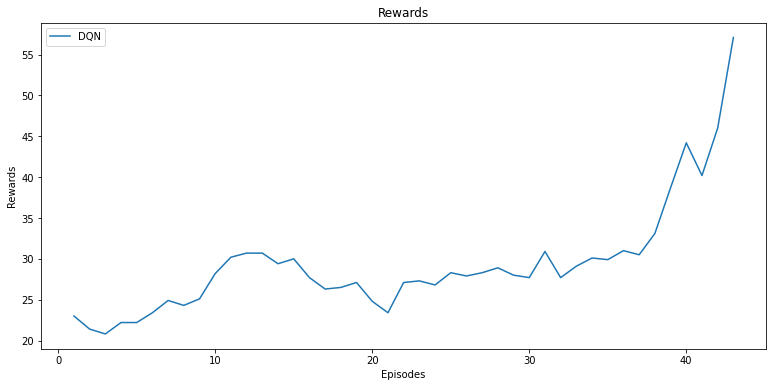

In [12]:
rewser = []
window = 10

score = rolling(np.array(score), window)
rewser.append({"x": np.arange(1, len(score) + 1), "y": score, "ls": "-", "label": "DQN"})
plot(rewser, "Rewards", "Episodes", "Rewards")

**Standard DQN on CartPole results:**
<img src="images/results-standard.png" width="600">